# **Problem statement**

A major general insurance company has a business problem with significant number of claims being reported are fraudulent in nature and it is leading to leakages.  So, the Insurer decided to predict the fraudulent ones before even processing the claims to allocate costs appropriately, to keep the thorough investigation process in place and to design proper action plan for the claims etc.

Insurance fraud refers to any claim with the intent to obtain an improper payment from an insurer.  Motor and health insurance are the two prominent segments that have seen a spurt in fraud. Frauds can be classified from source and/or nature point of view. 
About Data:  The data consists of:
 1. Demographics Data  : These files consist of the demographic data of each customer, like CustomerID, Country, InsuredAge, InsuredGender, InsuredEducationLevel,etc .
2. Policy Information : These files consist of the  customer auto insurance policy information, connected to the claim with the insurance company, like, CustomerID,         InsurancePolicyNumber, DateOfPolicyCoverage, InsurancePolicyState, UmbrellaLimit, etc.
3. Data of Claim : These files consist of the details about the insurance claim, that the customer applied for,         like DateOfIncident, TypeOfIncident, AmountOfInjuryclaim,   AmountOfPropertyClaim, etc
4. Data of  Vehicle : These files consist of the details about the Vehicle, connected to the policy. 
5. Fraud Data : This Train.csv  contains the Fraud information details, like  CustomerID, ReportedFraud.        ; Target variable will be shared in the next week



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
Data1=pd.read_csv('/content/Train_Claim.csv',na_values=["?","MISSINGVLAUES","MISSEDDATA","-5"])
Data2=pd.read_csv('/content/Train_Demographics.csv')
Data3=pd.read_csv('/content/Train_Policy.csv',na_values=["-1"])
Data4=pd.read_csv('/content/Train_Vehicle.csv',na_values=["???"])
Data5=pd.read_csv('/content/Traindata_with_Target.csv')

In [ ]:
type(Data1)

pandas.core.frame.DataFrame

In [ ]:
print('Data1:',Data1.shape)
print('Data2:',Data2.shape)
print('Data3:',Data3.shape)
print('Data4:',Data4.shape)
print('Data5:',Data5.shape)

Data1: (28836, 19)
Data2: (28836, 10)
Data3: (28836, 10)
Data4: (115344, 3)
Data5: (28836, 2)


In [ ]:
Data1

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17.0,3,NaN,1,0,NaN,65501.0,13417,6071,46013
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10.0,3,YES,2,1,YES,61382.0,15560,5919,39903
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22.0,1,YES,2,3,NO,66755.0,11630,11630,43495
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22.0,1,YES,2,3,NO,66243.0,12003,12003,42237
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10.0,1,NO,2,1,YES,53544.0,8829,7234,37481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,Cust9993,2015-01-24,Vehicle Theft,NaN,Trivial Damage,Police,State9,City4,Location 1890,3.0,1,NO,0,3,NaN,6590.0,870,1078,4642
28832,Cust9994,2015-02-09,Single Vehicle Collision,Front Collision,Minor Damage,Fire,State8,City3,Location 2097,17.0,1,YES,0,2,YES,74547.0,14699,7875,51973
28833,Cust9996,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City7,Location 1452,1.0,1,YES,2,0,YES,55305.0,7043,7043,41219
28834,Cust9997,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,State9,City3,Location 1876,1.0,1,NaN,2,0,YES,55830.0,7059,7059,41712


In [ ]:
Data2

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
0,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India
1,Cust10001,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India
2,Cust10002,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India
3,Cust10003,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India
4,Cust10004,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India
...,...,...,...,...,...,...,...,...,...,...
28831,Cust9993,46,600561,MALE,Masters,protective-serv,sleeping,0,0,India
28832,Cust9994,44,439304,MALE,Masters,adm-clerical,dancing,0,-28800,India
28833,Cust9996,53,460722,MALE,PhD,transport-moving,base-jumping,63100,-43800,India
28834,Cust9997,53,472634,MALE,Associate,transport-moving,skydiving,67400,-43800,India


In [ ]:
Data3

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID
0,110122,328,2014-10-17,State3,250/500,1000,1406.91,0,husband,Cust1001
1,110125,256,1990-05-25,State1,250/500,2000,1415.74,6000000,unmarried,Cust1004
2,110126,228,2014-06-06,State1,500/1000,1000,1583.91,6000000,unmarried,Cust1005
3,110127,256,2006-10-12,State3,250/500,1000,1351.10,0,unmarried,Cust1006
4,110128,137,2000-06-04,State2,250/500,1000,1333.35,0,husband,Cust1007
...,...,...,...,...,...,...,...,...,...,...
28831,148614,425,1999-10-12,State3,250/500,1000,839.81,0,wife,Cust39493
28832,148615,367,1996-11-09,State3,250/500,1000,811.03,0,husband,Cust39494
28833,148616,208,1995-12-04,State3,250/500,1000,891.37,0,husband,Cust39495
28834,148618,401,1994-09-12,State3,250/500,856,911.37,0,own-child,Cust39497


In [ ]:
Data4

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust20179,VehicleID,Vehicle8898
1,Cust21384,VehicleModel,Malibu
2,Cust33335,VehicleMake,Toyota
3,Cust27118,VehicleModel,Neon
4,Cust13038,VehicleID,Vehicle30212
...,...,...,...
115339,Cust22134,VehicleMake,Audi
115340,Cust25338,VehicleID,Vehicle28831
115341,Cust7637,VehicleID,Vehicle12870
115342,Cust33581,VehicleID,Vehicle19680


In [ ]:
Data5

,CustomerID,ReportedFraud
0,Cust20065,N
1,Cust37589,N
2,Cust24312,N
3,Cust5493,Y
4,Cust7704,Y
...,...,...
28831,Cust9773,N
28832,Cust38439,N
28833,Cust38444,N
28834,Cust26466,N


In [ ]:
Data4 = pd.crosstab(Data4["CustomerID"], Data4["VehicleAttribute"], Data4["VehicleAttributeDetails"],aggfunc="first")

In [ ]:
Data4

VehicleAttribute,VehicleID,VehicleMake,VehicleModel,VehicleYOM
CustomerID,,,,
Cust10000,Vehicle26917,Audi,A5,2008
Cust10001,Vehicle15893,Audi,A5,2006
Cust10002,Vehicle5152,Volkswagen,Jetta,1999
Cust10003,Vehicle37363,Volkswagen,Jetta,2003
Cust10004,Vehicle28633,Toyota,CRV,2010
...,...,...,...,...
Cust9993,Vehicle13568,Suburu,Impreza,2007
Cust9994,Vehicle19810,Jeep,Wrangler,2003
Cust9996,Vehicle3339,Suburu,Legacy,2004


In [ ]:
merged_Data = pd.merge(Data1, Data2, on='CustomerID')
merged_Data = pd.merge(merged_Data, Data3, on='CustomerID')
merged_Data = pd.merge(merged_Data, Data4, on='CustomerID')
merged_Data = pd.merge(merged_Data, Data5, on='CustomerID')

In [ ]:
Data=merged_Data.to_csv("merged_file.csv",index=False)

In [ ]:
Data=pd.read_csv('/content/merged_file.csv')

In [ ]:
Data.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM,ReportedFraud
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17.0,...,100/300,1000,1632.73,0,not-in-family,Vehicle26917,Audi,A5,2008,N
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10.0,...,100/300,1000,1255.19,0,not-in-family,Vehicle15893,Audi,A5,2006,N
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22.0,...,500/1000,617,1373.38,0,wife,Vehicle5152,Volkswagen,Jetta,1999,N
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22.0,...,500/1000,722,1337.60,0,own-child,Vehicle37363,Volkswagen,Jetta,2003,N
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10.0,...,100/300,500,1353.73,4279863,unmarried,Vehicle28633,Toyota,CRV,2010,N


In [ ]:
Data.tail()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM,ReportedFraud
28831,Cust9993,2015-01-24,Vehicle Theft,NaN,Trivial Damage,Police,State9,City4,Location 1890,3.0,...,500/1000,655,1276.01,0,unmarried,Vehicle13568,Suburu,Impreza,2007,N
28832,Cust9994,2015-02-09,Single Vehicle Collision,Front Collision,Minor Damage,Fire,State8,City3,Location 2097,17.0,...,100/300,1089,1273.38,0,unmarried,Vehicle19810,Jeep,Wrangler,2003,N
28833,Cust9996,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City7,Location 1452,1.0,...,250/500,787,1380.92,3448735,own-child,Vehicle3339,Suburu,Legacy,2004,N
28834,Cust9997,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,State9,City3,Location 1876,1.0,...,250/500,780,1389.29,3364301,not-in-family,Vehicle10240,Suburu,Forrestor,2004,N
28835,Cust9999,2015-01-13,Single Vehicle Collision,Front Collision,Total Loss,Other,State8,City3,Location 1874,9.0,...,500/1000,2000,928.43,2909175,husband,Vehicle39163,Suburu,E400,2007,N


In [ ]:
type(Data)

pandas.core.frame.DataFrame

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  28836 non-null  object 
 1   DateOfIncident              28836 non-null  object 
 2   TypeOfIncident              28836 non-null  object 
 3   TypeOfCollission            23674 non-null  object 
 4   SeverityOfIncident          28836 non-null  object 
 5   AuthoritiesContacted        28836 non-null  object 
 6   IncidentState               28836 non-null  object 
 7   IncidentCity                28836 non-null  object 
 8   IncidentAddress             28836 non-null  object 
 9   IncidentTime                28805 non-null  float64
 10  NumberOfVehicles            28836 non-null  int64  
 11  PropertyDamage              18377 non-null  object 
 12  BodilyInjuries              28836 non-null  int64  
 13  Witnesses                   288

In [ ]:
Data.dtypes

CustomerID                     object
DateOfIncident                 object
TypeOfIncident                 object
TypeOfCollission               object
SeverityOfIncident             object
AuthoritiesContacted           object
IncidentState                  object
IncidentCity                   object
IncidentAddress                object
IncidentTime                  float64
NumberOfVehicles                int64
PropertyDamage                 object
BodilyInjuries                  int64
Witnesses                      object
PoliceReport                   object
AmountOfTotalClaim            float64
AmountOfInjuryClaim             int64
AmountOfPropertyClaim           int64
AmountOfVehicleDamage           int64
InsuredAge                      int64
InsuredZipCode                  int64
InsuredGender                  object
InsuredEducationLevel          object
InsuredOccupation              object
InsuredHobbies                 object
CapitalGains                    int64
CapitalLoss 

In [ ]:
Data.isnull().sum()

CustomerID                        0
DateOfIncident                    0
TypeOfIncident                    0
TypeOfCollission               5162
SeverityOfIncident                0
AuthoritiesContacted              0
IncidentState                     0
IncidentCity                      0
IncidentAddress                   0
IncidentTime                     31
NumberOfVehicles                  0
PropertyDamage                10459
BodilyInjuries                    0
Witnesses                         0
PoliceReport                   9805
AmountOfTotalClaim               50
AmountOfInjuryClaim               0
AmountOfPropertyClaim             0
AmountOfVehicleDamage             0
InsuredAge                        0
InsuredZipCode                    0
InsuredGender                    30
InsuredEducationLevel             0
InsuredOccupation                 0
InsuredHobbies                    0
CapitalGains                      0
CapitalLoss                       0
Country                     

In [ ]:
Data.shape

(28836, 42)

In [ ]:
Data['ReportedFraud']

0        N
1        N
2        N
3        N
4        N
        ..
28831    N
28832    N
28833    N
28834    N
28835    N
Name: ReportedFraud, Length: 28836, dtype: object

Converting Y as 1 and N as 0 in the target Column(ReportedFraud)

In [ ]:
Converting={"Y":1,"N":0}

In [ ]:
Data['ReportedFraud']=Data['ReportedFraud'].replace(Converting)

In [ ]:
Data['ReportedFraud']

0        0
1        0
2        0
3        0
4        0
        ..
28831    0
28832    0
28833    0
28834    0
28835    0
Name: ReportedFraud, Length: 28836, dtype: int64

In [ ]:
Data.columns

Index(['CustomerID', 'DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'IncidentTime', 'NumberOfVehicles',
       'PropertyDamage', 'BodilyInjuries', 'Witnesses', 'PoliceReport',
       'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage', 'InsuredAge', 'InsuredZipCode',
       'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation',
       'InsuredHobbies', 'CapitalGains', 'CapitalLoss', 'Country',
       'InsurancePolicyNumber', 'CustomerLoyaltyPeriod',
       'DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'InsuredRelationship',
       'VehicleID', 'VehicleMake', 'VehicleModel', 'VehicleYOM',
       'ReportedFraud'],
      dtype='object')

In [ ]:
Data['DateOfIncident'] = pd.to_datetime(Data['DateOfIncident'])
Data["DateOfIncident"].dtypes

dtype('<M8[ns]')

In [ ]:
Data['DateOfPolicyCoverage'] = pd.to_datetime(Data['DateOfPolicyCoverage'])
Data["DateOfPolicyCoverage"].dtypes

dtype('<M8[ns]')

In [ ]:
# create new columns for day, month, and year
Data['DayOfIncident'] = Data['DateOfIncident'].dt.day
Data['MonthOfIncident'] = Data['DateOfIncident'].dt.month
Data['YearOfIncident'] = Data['DateOfIncident'].dt.year

In [ ]:
 #create new columns for day, month, and year
Data['DayOfPolicyCoverage'] = Data['DateOfPolicyCoverage'].dt.day
Data['MonthOfPolicyCoverage'] = Data['DateOfPolicyCoverage'].dt.month
Data['YearOfPolicyCoverage'] = Data['DateOfPolicyCoverage'].dt.year

In [ ]:
Data = Data.astype({"CustomerID":"category","PoliceReport":"category","VehicleID":"category","Country":"category","TypeOfIncident":"category","TypeOfCollission":"category","SeverityOfIncident":"category","AuthoritiesContacted":"category","IncidentState":"category","IncidentCity":"category","IncidentAddress":"category","PropertyDamage":"category","Witnesses":"category","InsuredZipCode":"category","InsuredGender":"category","InsuredEducationLevel":"category","InsuredOccupation":"category","InsuredHobbies":"category","DateOfPolicyCoverage":"category","InsurancePolicyState":"category","Policy_CombinedSingleLimit":"category","InsuredRelationship":"category","ReportedFraud":"category","VehicleMake":"category","VehicleModel":"category","VehicleYOM":"category","DayOfIncident":"category","MonthOfIncident":"category","YearOfIncident":"category","DayOfPolicyCoverage":"category","MonthOfPolicyCoverage":"category","YearOfPolicyCoverage":"category"})
print(Data.shape)
print(Data.dtypes)

(28836, 48)
CustomerID                          category
DateOfIncident                datetime64[ns]
TypeOfIncident                      category
TypeOfCollission                    category
SeverityOfIncident                  category
AuthoritiesContacted                category
IncidentState                       category
IncidentCity                        category
IncidentAddress                     category
IncidentTime                         float64
NumberOfVehicles                       int64
PropertyDamage                      category
BodilyInjuries                         int64
Witnesses                           category
PoliceReport                        category
AmountOfTotalClaim                   float64
AmountOfInjuryClaim                    int64
AmountOfPropertyClaim                  int64
AmountOfVehicleDamage                  int64
InsuredAge                             int64
InsuredZipCode                      category
InsuredGender                       categor

In [ ]:
Data.shape

(28836, 48)

In [ ]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
IncidentTime,28805.0,11.764069,6.148869e+00,0.00,6.000,12.00,17.00,23.00
NumberOfVehicles,28836.0,1.823207,9.800987e-01,1.00,1.000,1.00,3.00,4.00
BodilyInjuries,28836.0,0.985782,7.847641e-01,0.00,0.000,1.00,2.00,2.00
AmountOfTotalClaim,28786.0,52308.545473,2.510117e+04,150.00,44643.750,58360.00,68982.75,114920.00
AmountOfInjuryClaim,28836.0,7337.118428,4.427639e+03,0.00,4743.750,7147.00,10571.25,21450.00
AmountOfPropertyClaim,28836.0,7283.870197,4.375843e+03,0.00,4862.000,7051.00,10327.00,23670.00
AmountOfVehicleDamage,28836.0,37687.129387,1.797705e+04,109.00,32193.250,42457.50,49535.75,79560.00
InsuredAge,28836.0,38.815370,7.996377e+00,19.00,33.000,38.00,44.00,64.00
CapitalGains,28836.0,23066.569566,2.763781e+04,0.00,0.000,0.00,49000.00,100500.00
CapitalLoss,28836.0,-24940.612429,2.791321e+04,-111100.00,-50000.000,0.00,0.00,0.00


In [ ]:
Data.duplicated().sum()

0

## **Checking whether the target variable has class imbalance or not**

In [ ]:
Data.ReportedFraud.value_counts(normalize=True)*100

0    73.002497
1    26.997503
Name: ReportedFraud, dtype: float64

## **Visualization**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


Text(0, 0.5, 'Count')

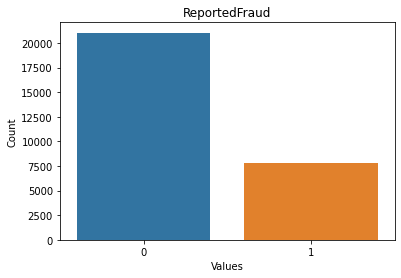

In [ ]:
sns.countplot(x=Data['ReportedFraud'])
plt.title("ReportedFraud")
plt.xlabel("Values")
plt.ylabel("Count")

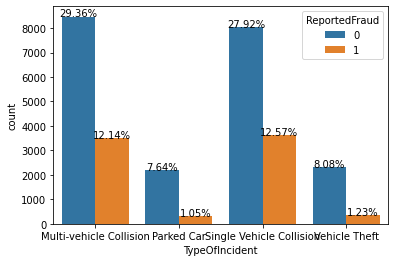

In [ ]:
# add the count values and percentages on top of each bar
countplot = sns.countplot(x = Data["TypeOfIncident"], hue = "ReportedFraud", data = Data)
total = float(len(Data["TypeOfIncident"]))  # total count of all data points
for p in countplot.patches:
    height = p.get_height()
    countplot.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}%'.format((height/total)*100),
            ha="center", fontsize=10)  # add percentage
plt.show()

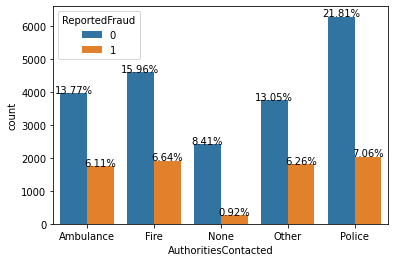

In [ ]:
countplot = sns.countplot(x = Data["AuthoritiesContacted"], hue = "ReportedFraud", data = Data)
total = float(len(Data["AuthoritiesContacted"]))  # total count of all data points
for p in countplot.patches:
    height = p.get_height()
    countplot.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}%'.format((height/total)*100),
            ha="center", fontsize=10)  # add percentage
plt.show()

<Axes: >

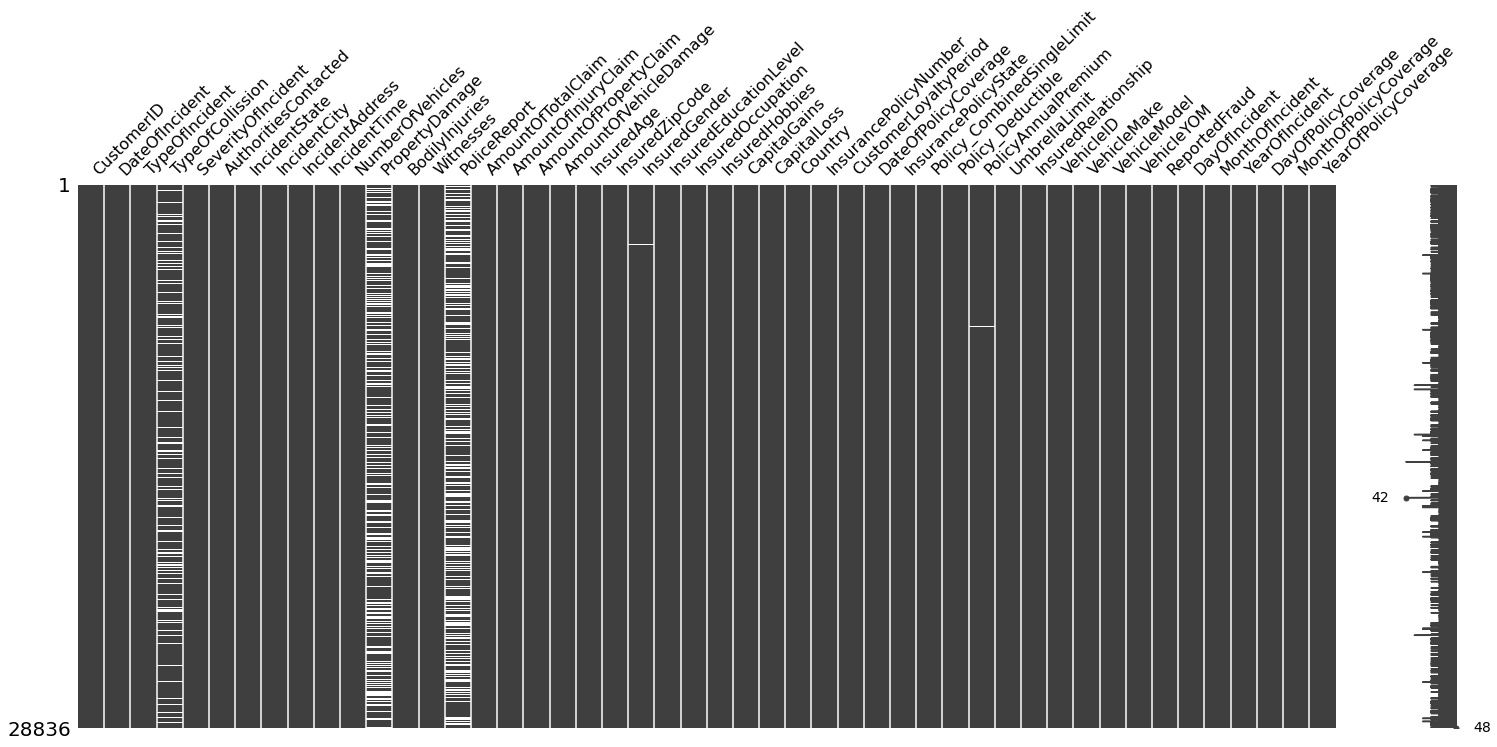

In [ ]:
import missingno as mno
mno.matrix(Data)

In [ ]:
null_values = Data.isnull().sum()*100/len(Data)
null_values = null_values.round(2)
null_values

CustomerID                     0.00
DateOfIncident                 0.00
TypeOfIncident                 0.00
TypeOfCollission              17.90
SeverityOfIncident             0.00
AuthoritiesContacted           0.00
IncidentState                  0.00
IncidentCity                   0.00
IncidentAddress                0.00
IncidentTime                   0.11
NumberOfVehicles               0.00
PropertyDamage                36.27
BodilyInjuries                 0.00
Witnesses                      0.00
PoliceReport                  34.00
AmountOfTotalClaim             0.17
AmountOfInjuryClaim            0.00
AmountOfPropertyClaim          0.00
AmountOfVehicleDamage          0.00
InsuredAge                     0.00
InsuredZipCode                 0.00
InsuredGender                  0.10
InsuredEducationLevel          0.00
InsuredOccupation              0.00
InsuredHobbies                 0.00
CapitalGains                   0.00
CapitalLoss                    0.00
Country                     

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
insignificant_columns = []
for column in Data.columns:
  contingency_table = pd.crosstab(Data[column], Data["ReportedFraud"])
  chi2, p_value, dof, expected = chi2_contingency(contingency_table)
  if p_value > 0.05: # Check if p-value is greater than 0.05
      insignificant_columns.append(column)

In [ ]:
print(insignificant_columns)

['CustomerID', 'PoliceReport', 'Country', 'InsurancePolicyNumber', 'PolicyAnnualPremium', 'VehicleID', 'YearOfIncident']


**Heatmap**

In [ ]:
Data.drop(['CustomerID', 'PoliceReport', 'Country', 'InsurancePolicyNumber', 'PolicyAnnualPremium', 'VehicleID', 'YearOfIncident'],axis = 1, inplace = True)
Data.shape

(28836, 41)

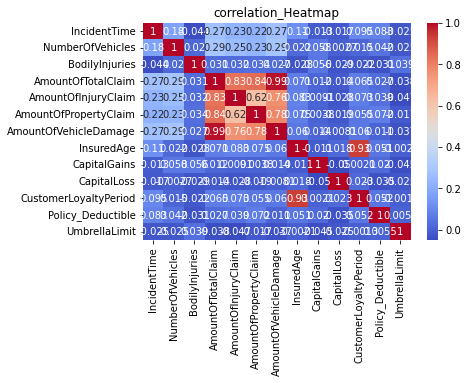

In [ ]:
corr_matrix=Data.corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title("correlation_Heatmap")
plt.show()

 **Dropping the columns based on correlation**

In [ ]:
Data.shape

(28836, 41)

In [ ]:
Data.columns

Index(['DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'IncidentTime', 'NumberOfVehicles',
       'PropertyDamage', 'BodilyInjuries', 'Witnesses', 'AmountOfTotalClaim',
       'AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfVehicleDamage',
       'InsuredAge', 'InsuredZipCode', 'InsuredGender',
       'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies',
       'CapitalGains', 'CapitalLoss', 'CustomerLoyaltyPeriod',
       'DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'Policy_Deductible', 'UmbrellaLimit',
       'InsuredRelationship', 'VehicleMake', 'VehicleModel', 'VehicleYOM',
       'ReportedFraud', 'DayOfIncident', 'MonthOfIncident',
       'DayOfPolicyCoverage', 'MonthOfPolicyCoverage', 'YearOfPolicyCoverage'],
      dtype='object')

In [ ]:
Data.drop(["AmountOfInjuryClaim","AmountOfPropertyClaim","AmountOfVehicleDamage","InsuredAge"],axis = 1, inplace = True)
Data.shape

(28836, 37)

In [ ]:
Data.columns

Index(['DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'IncidentTime', 'NumberOfVehicles',
       'PropertyDamage', 'BodilyInjuries', 'Witnesses', 'AmountOfTotalClaim',
       'InsuredZipCode', 'InsuredGender', 'InsuredEducationLevel',
       'InsuredOccupation', 'InsuredHobbies', 'CapitalGains', 'CapitalLoss',
       'CustomerLoyaltyPeriod', 'DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'Policy_Deductible', 'UmbrellaLimit',
       'InsuredRelationship', 'VehicleMake', 'VehicleModel', 'VehicleYOM',
       'ReportedFraud', 'DayOfIncident', 'MonthOfIncident',
       'DayOfPolicyCoverage', 'MonthOfPolicyCoverage', 'YearOfPolicyCoverage'],
      dtype='object')

In [ ]:
Data.drop(["DateOfIncident","IncidentCity","IncidentAddress","InsuredZipCode","InsuredEducationLevel","InsuredOccupation","InsuredHobbies","CapitalGains","CapitalLoss","InsurancePolicyState","DayOfIncident","MonthOfIncident","DayOfPolicyCoverage","MonthOfPolicyCoverage","DateOfPolicyCoverage","VehicleModel"],axis = 1, inplace = True)
Data.shape

(28836, 21)

In [ ]:
Data.columns

Index(['TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident',
       'AuthoritiesContacted', 'IncidentState', 'IncidentTime',
       'NumberOfVehicles', 'PropertyDamage', 'BodilyInjuries', 'Witnesses',
       'AmountOfTotalClaim', 'InsuredGender', 'CustomerLoyaltyPeriod',
       'Policy_CombinedSingleLimit', 'Policy_Deductible', 'UmbrellaLimit',
       'InsuredRelationship', 'VehicleMake', 'VehicleYOM', 'ReportedFraud',
       'YearOfPolicyCoverage'],
      dtype='object')

In [ ]:
Data.dtypes

TypeOfIncident                category
TypeOfCollission              category
SeverityOfIncident            category
AuthoritiesContacted          category
IncidentState                 category
IncidentTime                   float64
NumberOfVehicles                 int64
PropertyDamage                category
BodilyInjuries                   int64
Witnesses                     category
AmountOfTotalClaim             float64
InsuredGender                 category
CustomerLoyaltyPeriod            int64
Policy_CombinedSingleLimit    category
Policy_Deductible                int64
UmbrellaLimit                    int64
InsuredRelationship           category
VehicleMake                   category
VehicleYOM                    category
ReportedFraud                 category
YearOfPolicyCoverage          category
dtype: object

In [ ]:
cat_cols = ["TypeOfIncident","TypeOfCollission","SeverityOfIncident","AuthoritiesContacted","IncidentState","PropertyDamage","Witnesses","InsuredGender","Policy_CombinedSingleLimit","InsuredRelationship","VehicleMake","VehicleYOM"]
num_cols = ["IncidentTime","NumberOfVehicles","BodilyInjuries","AmountOfTotalClaim","CustomerLoyaltyPeriod","Policy_Deductible","UmbrellaLimit"]

In [ ]:
print(cat_cols)

['TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState', 'PropertyDamage', 'Witnesses', 'InsuredGender', 'Policy_CombinedSingleLimit', 'InsuredRelationship', 'VehicleMake', 'VehicleYOM']


In [ ]:
print(num_cols)

['IncidentTime', 'NumberOfVehicles', 'BodilyInjuries', 'AmountOfTotalClaim', 'CustomerLoyaltyPeriod', 'Policy_Deductible', 'UmbrellaLimit']


In [ ]:
X=Data.drop(['ReportedFraud'],axis=1)
y=Data['ReportedFraud']

In [ ]:
X

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,AmountOfTotalClaim,InsuredGender,CustomerLoyaltyPeriod,Policy_CombinedSingleLimit,Policy_Deductible,UmbrellaLimit,InsuredRelationship,VehicleMake,VehicleYOM,YearOfPolicyCoverage
0,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,17.0,3,NaN,1,0,65501.0,MALE,49,100/300,1000,0,not-in-family,Audi,2008,1998
1,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,10.0,3,YES,2,1,61382.0,MALE,114,100/300,1000,0,not-in-family,Audi,2006,2000
2,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,22.0,1,YES,2,3,66755.0,MALE,167,500/1000,617,0,wife,Volkswagen,1999,2001
3,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,22.0,1,YES,2,3,66243.0,MALE,190,500/1000,722,0,own-child,Volkswagen,2003,2005
4,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,10.0,1,NO,2,1,53544.0,FEMALE,115,100/300,500,4279863,unmarried,Toyota,2010,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,Vehicle Theft,NaN,Trivial Damage,Police,State9,3.0,1,NO,0,3,6590.0,MALE,321,500/1000,655,0,unmarried,Suburu,2007,1998
28832,Single Vehicle Collision,Front Collision,Minor Damage,Fire,State8,17.0,1,YES,0,2,74547.0,MALE,237,100/300,1089,0,unmarried,Jeep,2003,2004
28833,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,1.0,1,YES,2,0,55305.0,MALE,392,250/500,787,3448735,own-child,Suburu,2004,1998
28834,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,State9,1.0,1,NaN,2,0,55830.0,MALE,391,250/500,780,3364301,not-in-family,Suburu,2004,1998


In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
28831    0
28832    0
28833    0
28834    0
28835    0
Name: ReportedFraud, Length: 28836, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
# detecting ouliers for all before removing 
Q1 = Data[num_cols].quantile(0.25)
Q3 = Data[num_cols].quantile(0.75)
IQR = Q3-Q1

before_rvm_outliers = ((Data[num_cols]<(Q1-1.5*IQR)) | (Data[num_cols]>(Q3+1.5*IQR))).sum()
before_rvm_outliers

IncidentTime                0
NumberOfVehicles            0
BodilyInjuries              0
AmountOfTotalClaim       4934
CustomerLoyaltyPeriod       2
Policy_Deductible           0
UmbrellaLimit            6455
dtype: int64

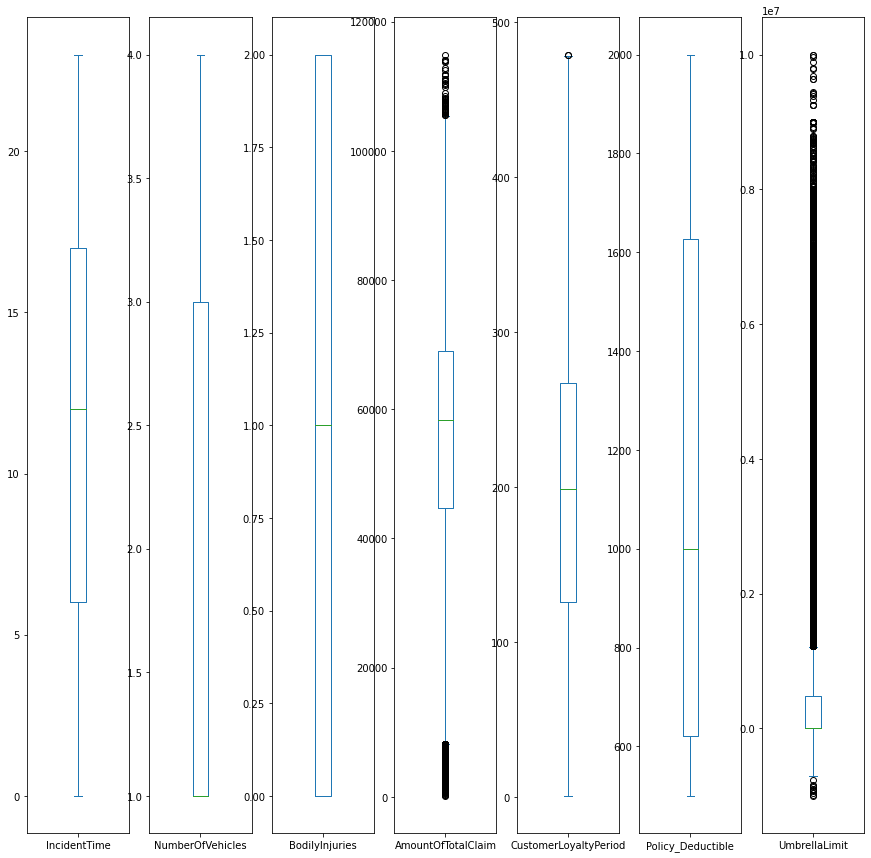

In [ ]:
#boxplot for all the numerical attributes in dataframe
Data.plot(kind ='box',subplots = True,sharex= False,sharey=False,figsize=(15,15))
plt.show()

In [ ]:
# import the random module 
import random

#define a function train_test_split that takes a DataFrame 'X' and a test size as input
def train_test_split(X,test_size=0.2):
  
  #get the size of the input DataFrame 'X'
  Wine_Quality_size = len(X)
  
  #calculate the size of the test data based on the test size parameter
  Test_Data_size = int(Wine_Quality_size*test_size)

  #calculate the size of the train data by substracting the test data size from the input data size
  Train_Data_size = Wine_Quality_size - Test_Data_size
  
  #function Random_shuffle to shuffle the input data randomly
  def Random_shuffle(X):
    for i in range(len(X)-1,0,-1):
      j = random.randint(0,i)
      X[i],X[j] = X[j],X[i]
  
  #split the shuffled data in to train and test data based on the calculated train and test data sizes
  X_train=X[:Train_Data_size]
  X_test = X[Train_Data_size:]

  # return the train and test data as separate DataFrames
  return X_train,X_test

In [ ]:
X_train,X_test=train_test_split(X,test_size=0.3)# train_test_split() function 'x' as the dataset to be split and test_size=0.2 to specify that 20%  

In [ ]:
y_train,y_test=train_test_split(y,test_size=0.3)#train_test_split() function 'x' as the dataset to be split and test_size=0.2 to specify that 20% 

In [ ]:
print("X_train:",X_train.shape)#print the shape of X_train
print("X_test:",X_test.shape)#print the shape of X_test
print("y_train:",y_train.shape)#print the shape of Y_train
print("y_test:",y_test.shape)#print the shape of y_test

X_train: (20186, 20)
X_test: (8650, 20)
y_train: (20186,)
y_test: (8650,)


In [ ]:
print("X_train:",type(X_train))
print("X_test:",type(X_test))
print("y_train:",type(y_train))
print("Y_test:",type(y_test))

X_train: <class 'pandas.core.frame.DataFrame'>
X_test: <class 'pandas.core.frame.DataFrame'>
y_train: <class 'pandas.core.series.Series'>
Y_test: <class 'pandas.core.series.Series'>


In [ ]:
y_train.value_counts(normalize = True)


0    0.8011
1    0.1989
Name: ReportedFraud, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

0    0.564162
1    0.435838
Name: ReportedFraud, dtype: float64

In [ ]:
X_train.isnull().sum()

TypeOfIncident                   0
TypeOfCollission              3918
SeverityOfIncident               0
AuthoritiesContacted             0
IncidentState                    0
IncidentTime                    23
NumberOfVehicles                 0
PropertyDamage                7209
BodilyInjuries                   0
Witnesses                        0
AmountOfTotalClaim              38
InsuredGender                   21
CustomerLoyaltyPeriod            0
Policy_CombinedSingleLimit       0
Policy_Deductible                0
UmbrellaLimit                    0
InsuredRelationship              0
VehicleMake                     38
VehicleYOM                       0
YearOfPolicyCoverage             0
dtype: int64

In [ ]:
X_test.isnull().sum()

TypeOfIncident                   0
TypeOfCollission              1244
SeverityOfIncident               0
AuthoritiesContacted             0
IncidentState                    0
IncidentTime                     8
NumberOfVehicles                 0
PropertyDamage                3250
BodilyInjuries                   0
Witnesses                        0
AmountOfTotalClaim              12
InsuredGender                    9
CustomerLoyaltyPeriod            0
Policy_CombinedSingleLimit       0
Policy_Deductible                0
UmbrellaLimit                    0
InsuredRelationship              0
VehicleMake                     12
VehicleYOM                       0
YearOfPolicyCoverage             0
dtype: int64

In [ ]:
X_train.dtypes
X_test.dtypes

TypeOfIncident                category
TypeOfCollission              category
SeverityOfIncident            category
AuthoritiesContacted          category
IncidentState                 category
IncidentTime                   float64
NumberOfVehicles                 int64
PropertyDamage                category
BodilyInjuries                   int64
Witnesses                     category
AmountOfTotalClaim             float64
InsuredGender                 category
CustomerLoyaltyPeriod            int64
Policy_CombinedSingleLimit    category
Policy_Deductible                int64
UmbrellaLimit                    int64
InsuredRelationship           category
VehicleMake                   category
VehicleYOM                    category
YearOfPolicyCoverage          category
dtype: object

In [ ]:
import numpy as np

def simple_imputer(data,strategy):
    # Find the median value of each column
    median_vals = np.nanmedian(data, axis=0)

    # Replace missing values with the column median
    data[np.isnan(data)] = np.take(median_vals, np.isnan(data).nonzero()[1])

    return data

In [ ]:
import numpy as np

def simple_imputer(X):
    """
    Replace missing values in X with the median of the column.
    """
    X_imputed = X.copy()
    num_rows, num_cols = X_imputed.shape
    for j in range(num_cols):
        mask = np.isnan(X_imputed[:, j])
        if np.any(mask):
            median = np.median(X_imputed[~mask, j])
            X_imputed[mask, j] = median
    return X_imputed

In [ ]:
#importing  SimpleImputer to impute null values
from sklearn.impute import SimpleImputer

In [ ]:
# fitting the X_train[num_cols] in imputer model
num_cols_imputer = SimpleImputer(strategy='median')
num_cols_imputer = num_cols_imputer.fit(X_train.loc[:,num_cols])

In [ ]:
# fitting the X_train[num_cols] and X_test[num_cols] in imputer model
X_train.loc[:,num_cols] = num_cols_imputer.transform(X_train.loc[:,num_cols])
X_test.loc[:,num_cols] = num_cols_imputer.transform(X_test.loc[:,num_cols])

<ipython-input-79-9f763b770bce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[:,num_cols] = num_cols_imputer.transform(X_train.loc[:,num_cols])
<ipython-input-79-9f763b770bce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[:,num_cols] = num_cols_imputer.transform(X_test.loc[:,num_cols])


In [ ]:
X_train.loc[:,num_cols].isnull().sum()

IncidentTime             0
NumberOfVehicles         0
BodilyInjuries           0
AmountOfTotalClaim       0
CustomerLoyaltyPeriod    0
Policy_Deductible        0
UmbrellaLimit            0
dtype: int64

In [ ]:
X_test.loc[:,num_cols].isnull().sum()

IncidentTime             0
NumberOfVehicles         0
BodilyInjuries           0
AmountOfTotalClaim       0
CustomerLoyaltyPeriod    0
Policy_Deductible        0
UmbrellaLimit            0
dtype: int64

In [ ]:
# fitting the X_train[cat_cols] in imputer model
cat_cols_imputer = SimpleImputer(strategy='most_frequent')
cat_cols_imputer = cat_cols_imputer.fit(X_train[cat_cols])

In [ ]:
# fitting the X_train[cat_cols] and X_test[cat_cols] in imputer model
X_train[cat_cols] = cat_cols_imputer.transform(X_train[cat_cols])
X_test[cat_cols] = cat_cols_imputer.transform(X_test[cat_cols])

<ipython-input-83-03b9c4977795>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[cat_cols] = cat_cols_imputer.transform(X_train[cat_cols])
<ipython-input-83-03b9c4977795>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[cat_cols] = cat_cols_imputer.transform(X_test[cat_cols])


In [ ]:
X_train.isnull().sum()

TypeOfIncident                0
TypeOfCollission              0
SeverityOfIncident            0
AuthoritiesContacted          0
IncidentState                 0
IncidentTime                  0
NumberOfVehicles              0
PropertyDamage                0
BodilyInjuries                0
Witnesses                     0
AmountOfTotalClaim            0
InsuredGender                 0
CustomerLoyaltyPeriod         0
Policy_CombinedSingleLimit    0
Policy_Deductible             0
UmbrellaLimit                 0
InsuredRelationship           0
VehicleMake                   0
VehicleYOM                    0
YearOfPolicyCoverage          0
dtype: int64

In [ ]:
X_test.isnull().sum()

TypeOfIncident                0
TypeOfCollission              0
SeverityOfIncident            0
AuthoritiesContacted          0
IncidentState                 0
IncidentTime                  0
NumberOfVehicles              0
PropertyDamage                0
BodilyInjuries                0
Witnesses                     0
AmountOfTotalClaim            0
InsuredGender                 0
CustomerLoyaltyPeriod         0
Policy_CombinedSingleLimit    0
Policy_Deductible             0
UmbrellaLimit                 0
InsuredRelationship           0
VehicleMake                   0
VehicleYOM                    0
YearOfPolicyCoverage          0
dtype: int64

In [ ]:
import numpy as np

class StandardScaler:
    def fit(X):
        mean_ = np.mean(X, axis=0)# Calculate the mean of each column of X
        std_ = np.std(X, axis=0)
        return mean_, std_ # Return the mean and standard deviation as a tuple

    def transform(X, mean_, std_):
        X_std = (X - mean_) / std_# Standardize the input data X using the mean and standard deviation
        return X_std# Return the standardized data

    def fit_transform(X):
        mean_, std_ = StandardScaler.fit(X)# Calculate the mean and standard deviation of X
        X_std = StandardScaler.transform(X, mean_, std_)# Standardize the input data X using the mean and standard deviation
        return X_std# Return the standardized data

In [ ]:
mean_, std_ = StandardScaler.fit(X_train[num_cols])
X_train_std = StandardScaler.transform(X_train[num_cols], mean_, std_)

In [ ]:
mean_, std_ = StandardScaler.fit(X_test[num_cols])
X_test_std = StandardScaler.transform(X_test[num_cols], mean_, std_)

In [ ]:
X_train_std.isnull().sum()

IncidentTime             0
NumberOfVehicles         0
BodilyInjuries           0
AmountOfTotalClaim       0
CustomerLoyaltyPeriod    0
Policy_Deductible        0
UmbrellaLimit            0
dtype: int64

In [ ]:
X_test_std.isnull().sum()

IncidentTime             0
NumberOfVehicles         0
BodilyInjuries           0
AmountOfTotalClaim       0
CustomerLoyaltyPeriod    0
Policy_Deductible        0
UmbrellaLimit            0
dtype: int64

In [ ]:
# creationg dummies for cat_cols from X_train
X_train_dummies = pd.get_dummies(X_train[cat_cols],drop_first = True)

/usr/local/lib/python3.9/dist-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [ ]:
X_train_dummies

,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Fire,AuthoritiesContacted_None,...,VehicleYOM_2006,VehicleYOM_2007,VehicleYOM_2008,VehicleYOM_2009,VehicleYOM_2010,VehicleYOM_2011,VehicleYOM_2012,VehicleYOM_2013,VehicleYOM_2014,VehicleYOM_2015
0,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20181,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
20182,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20183,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
20184,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# creationg dummies for cat_cols from X_test
X_test_dummies = pd.get_dummies(X_test[cat_cols],drop_first = True)

/usr/local/lib/python3.9/dist-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [ ]:
X_test_dummies

,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Fire,AuthoritiesContacted_None,...,VehicleYOM_2006,VehicleYOM_2007,VehicleYOM_2008,VehicleYOM_2009,VehicleYOM_2010,VehicleYOM_2011,VehicleYOM_2012,VehicleYOM_2013,VehicleYOM_2014,VehicleYOM_2015
20186,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20187,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
20188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
20189,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
20190,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,0,0,1,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
28832,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
28833,0,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
28834,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train_dummies.isnull().sum()

TypeOfIncident_Parked Car                  0
TypeOfIncident_Single Vehicle Collision    0
TypeOfIncident_Vehicle Theft               0
TypeOfCollission_Rear Collision            0
TypeOfCollission_Side Collision            0
                                          ..
VehicleYOM_2011                            0
VehicleYOM_2012                            0
VehicleYOM_2013                            0
VehicleYOM_2014                            0
VehicleYOM_2015                            0
Length: 70, dtype: int64

In [ ]:
X_test_dummies.isnull().sum()

TypeOfIncident_Parked Car                  0
TypeOfIncident_Single Vehicle Collision    0
TypeOfIncident_Vehicle Theft               0
TypeOfCollission_Rear Collision            0
TypeOfCollission_Side Collision            0
                                          ..
VehicleYOM_2011                            0
VehicleYOM_2012                            0
VehicleYOM_2013                            0
VehicleYOM_2014                            0
VehicleYOM_2015                            0
Length: 70, dtype: int64

In [ ]:
# resetting the index to concat correctly
X_train_std = X_train_std.reset_index()
X_train_std

,index,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfTotalClaim,CustomerLoyaltyPeriod,Policy_Deductible,UmbrellaLimit
0,0,0.839557,1.208465,0.014097,0.550965,-1.519482,-0.214818,-0.484709
1,1,-0.286274,1.208465,1.278795,0.390646,-0.877919,-0.214818,-0.484709
2,2,1.643722,-0.833393,1.278795,0.599773,-0.354798,-0.910402,-0.484709
3,3,1.643722,-0.833393,1.278795,0.579845,-0.127784,-0.719707,-0.484709
4,4,-0.286274,-0.833393,1.278795,0.085576,-0.868048,-1.122891,1.661807
...,...,...,...,...,...,...,...,...
20181,20181,0.196225,1.208465,-1.250602,0.631261,0.494039,-0.042284,-0.484709
20182,20182,1.322056,1.208465,-1.250602,-0.109617,-0.808827,-1.122891,-0.484709
20183,20183,-1.412105,-0.833393,-1.250602,0.503169,0.434818,1.601329,-0.484709
20184,20184,0.196225,1.208465,0.014097,0.583504,-0.117913,0.862157,0.332476


In [ ]:
#dropping the index column 
X_train_std = X_train_std.drop(["index"], axis = 1)
X_train_std

,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfTotalClaim,CustomerLoyaltyPeriod,Policy_Deductible,UmbrellaLimit
0,0.839557,1.208465,0.014097,0.550965,-1.519482,-0.214818,-0.484709
1,-0.286274,1.208465,1.278795,0.390646,-0.877919,-0.214818,-0.484709
2,1.643722,-0.833393,1.278795,0.599773,-0.354798,-0.910402,-0.484709
3,1.643722,-0.833393,1.278795,0.579845,-0.127784,-0.719707,-0.484709
4,-0.286274,-0.833393,1.278795,0.085576,-0.868048,-1.122891,1.661807
...,...,...,...,...,...,...,...
20181,0.196225,1.208465,-1.250602,0.631261,0.494039,-0.042284,-0.484709
20182,1.322056,1.208465,-1.250602,-0.109617,-0.808827,-1.122891,-0.484709
20183,-1.412105,-0.833393,-1.250602,0.503169,0.434818,1.601329,-0.484709
20184,0.196225,1.208465,0.014097,0.583504,-0.117913,0.862157,0.332476


In [ ]:
# resetting the index to concat correctly
X_test_std = X_test_std.reset_index()
X_test_std

,index,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfTotalClaim,CustomerLoyaltyPeriod,Policy_Deductible,UmbrellaLimit
0,20186,0.380370,1.182875,0.027753,0.479059,-0.024335,1.189876,0.000623
1,20187,-1.963315,1.182875,-1.269879,0.250827,-1.162767,-0.240095,-0.536064
2,20188,-0.289254,0.163765,-1.269879,-0.296152,-0.210624,-1.126378,-0.536064
3,20189,-0.289254,1.182875,-1.269879,-0.901086,0.099858,-0.573382,-0.536064
4,20190,1.719618,1.182875,-1.269879,0.574227,-0.252021,-0.195408,-0.536064
...,...,...,...,...,...,...,...,...
8645,28831,-1.461097,-0.855346,-1.269879,-2.048347,1.217591,-0.837777,-0.536064
8646,28832,0.882588,-0.855346,-1.269879,0.851792,0.348243,-0.029695,-0.536064
8647,28833,-1.795909,-0.855346,1.325384,0.030619,1.952397,-0.592001,1.269592
8648,28834,-1.795909,-0.855346,1.325384,0.053024,1.942048,-0.605035,1.225385


In [ ]:
# dropping the index column 
X_test_std = X_test_std.drop(["index"], axis = 1)
X_test_std

,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfTotalClaim,CustomerLoyaltyPeriod,Policy_Deductible,UmbrellaLimit
0,0.380370,1.182875,0.027753,0.479059,-0.024335,1.189876,0.000623
1,-1.963315,1.182875,-1.269879,0.250827,-1.162767,-0.240095,-0.536064
2,-0.289254,0.163765,-1.269879,-0.296152,-0.210624,-1.126378,-0.536064
3,-0.289254,1.182875,-1.269879,-0.901086,0.099858,-0.573382,-0.536064
4,1.719618,1.182875,-1.269879,0.574227,-0.252021,-0.195408,-0.536064
...,...,...,...,...,...,...,...
8645,-1.461097,-0.855346,-1.269879,-2.048347,1.217591,-0.837777,-0.536064
8646,0.882588,-0.855346,-1.269879,0.851792,0.348243,-0.029695,-0.536064
8647,-1.795909,-0.855346,1.325384,0.030619,1.952397,-0.592001,1.269592
8648,-1.795909,-0.855346,1.325384,0.053024,1.942048,-0.605035,1.225385


In [ ]:
# resetting the index to concat correctly
X_train_dummies = X_train_dummies.reset_index()
X_train_dummies

,index,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Fire,...,VehicleYOM_2006,VehicleYOM_2007,VehicleYOM_2008,VehicleYOM_2009,VehicleYOM_2010,VehicleYOM_2011,VehicleYOM_2012,VehicleYOM_2013,VehicleYOM_2014,VehicleYOM_2015
0,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,1,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20181,20181,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
20182,20182,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20183,20183,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
20184,20184,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# dropping the index column 
X_train_dummies = X_train_dummies.drop(["index"], axis = 1)
X_train_dummies

,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Fire,AuthoritiesContacted_None,...,VehicleYOM_2006,VehicleYOM_2007,VehicleYOM_2008,VehicleYOM_2009,VehicleYOM_2010,VehicleYOM_2011,VehicleYOM_2012,VehicleYOM_2013,VehicleYOM_2014,VehicleYOM_2015
0,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20181,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
20182,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20183,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
20184,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# resetting the index to concat correctly
X_test_dummies = X_test_dummies.reset_index()
X_test_dummies

,index,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Fire,...,VehicleYOM_2006,VehicleYOM_2007,VehicleYOM_2008,VehicleYOM_2009,VehicleYOM_2010,VehicleYOM_2011,VehicleYOM_2012,VehicleYOM_2013,VehicleYOM_2014,VehicleYOM_2015
0,20186,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20187,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,20188,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,20189,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,20190,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8645,28831,0,0,1,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
8646,28832,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8647,28833,0,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8648,28834,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# dropping the index column 
X_test_dummies = X_test_dummies.drop(["index"], axis = 1)
X_test_dummies

,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Fire,AuthoritiesContacted_None,...,VehicleYOM_2006,VehicleYOM_2007,VehicleYOM_2008,VehicleYOM_2009,VehicleYOM_2010,VehicleYOM_2011,VehicleYOM_2012,VehicleYOM_2013,VehicleYOM_2014,VehicleYOM_2015
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8645,0,0,1,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
8646,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8647,0,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8648,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train_dummies.isnull().sum()

TypeOfIncident_Parked Car                  0
TypeOfIncident_Single Vehicle Collision    0
TypeOfIncident_Vehicle Theft               0
TypeOfCollission_Rear Collision            0
TypeOfCollission_Side Collision            0
                                          ..
VehicleYOM_2011                            0
VehicleYOM_2012                            0
VehicleYOM_2013                            0
VehicleYOM_2014                            0
VehicleYOM_2015                            0
Length: 70, dtype: int64

In [ ]:
X_test_dummies.isnull().sum()

TypeOfIncident_Parked Car                  0
TypeOfIncident_Single Vehicle Collision    0
TypeOfIncident_Vehicle Theft               0
TypeOfCollission_Rear Collision            0
TypeOfCollission_Side Collision            0
                                          ..
VehicleYOM_2011                            0
VehicleYOM_2012                            0
VehicleYOM_2013                            0
VehicleYOM_2014                            0
VehicleYOM_2015                            0
Length: 70, dtype: int64

In [ ]:
# Concating the X_train_std, X_train_dummies as final_X_train_data
final_X_train = pd.concat([X_train_std,X_train_dummies], axis = 1)

In [ ]:
final_X_train


,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfTotalClaim,CustomerLoyaltyPeriod,Policy_Deductible,UmbrellaLimit,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,...,VehicleYOM_2006,VehicleYOM_2007,VehicleYOM_2008,VehicleYOM_2009,VehicleYOM_2010,VehicleYOM_2011,VehicleYOM_2012,VehicleYOM_2013,VehicleYOM_2014,VehicleYOM_2015
0,0.839557,1.208465,0.014097,0.550965,-1.519482,-0.214818,-0.484709,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,-0.286274,1.208465,1.278795,0.390646,-0.877919,-0.214818,-0.484709,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.643722,-0.833393,1.278795,0.599773,-0.354798,-0.910402,-0.484709,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1.643722,-0.833393,1.278795,0.579845,-0.127784,-0.719707,-0.484709,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.286274,-0.833393,1.278795,0.085576,-0.868048,-1.122891,1.661807,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20181,0.196225,1.208465,-1.250602,0.631261,0.494039,-0.042284,-0.484709,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20182,1.322056,1.208465,-1.250602,-0.109617,-0.808827,-1.122891,-0.484709,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20183,-1.412105,-0.833393,-1.250602,0.503169,0.434818,1.601329,-0.484709,0,1,0,...,0,0,0,0,0,0,0,0,0,0
20184,0.196225,1.208465,0.014097,0.583504,-0.117913,0.862157,0.332476,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
type(final_X_train)

pandas.core.frame.DataFrame

In [ ]:
# Concating the X_test_std, X_test_dummies as final_X_test_data
final_X_test = pd.concat([X_test_std,X_test_dummies], axis = 1)

In [ ]:
final_X_test

,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfTotalClaim,CustomerLoyaltyPeriod,Policy_Deductible,UmbrellaLimit,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,...,VehicleYOM_2006,VehicleYOM_2007,VehicleYOM_2008,VehicleYOM_2009,VehicleYOM_2010,VehicleYOM_2011,VehicleYOM_2012,VehicleYOM_2013,VehicleYOM_2014,VehicleYOM_2015
0,0.380370,1.182875,0.027753,0.479059,-0.024335,1.189876,0.000623,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.963315,1.182875,-1.269879,0.250827,-1.162767,-0.240095,-0.536064,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.289254,0.163765,-1.269879,-0.296152,-0.210624,-1.126378,-0.536064,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-0.289254,1.182875,-1.269879,-0.901086,0.099858,-0.573382,-0.536064,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1.719618,1.182875,-1.269879,0.574227,-0.252021,-0.195408,-0.536064,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8645,-1.461097,-0.855346,-1.269879,-2.048347,1.217591,-0.837777,-0.536064,0,0,1,...,0,1,0,0,0,0,0,0,0,0
8646,0.882588,-0.855346,-1.269879,0.851792,0.348243,-0.029695,-0.536064,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8647,-1.795909,-0.855346,1.325384,0.030619,1.952397,-0.592001,1.269592,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8648,-1.795909,-0.855346,1.325384,0.053024,1.942048,-0.605035,1.225385,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
final_X_train.isnull().sum()

IncidentTime             0
NumberOfVehicles         0
BodilyInjuries           0
AmountOfTotalClaim       0
CustomerLoyaltyPeriod    0
                        ..
VehicleYOM_2011          0
VehicleYOM_2012          0
VehicleYOM_2013          0
VehicleYOM_2014          0
VehicleYOM_2015          0
Length: 77, dtype: int64

In [ ]:
final_X_test.isnull().sum()

IncidentTime             0
NumberOfVehicles         0
BodilyInjuries           0
AmountOfTotalClaim       0
CustomerLoyaltyPeriod    0
                        ..
VehicleYOM_2011          0
VehicleYOM_2012          0
VehicleYOM_2013          0
VehicleYOM_2014          0
VehicleYOM_2015          0
Length: 77, dtype: int64

## **Model building**

In [ ]:
import numpy as np


class KNNClassifier:#constructor method that initilazies the k value
  def __init__(self, k=5):
    self.k = k
    

  def fit(self, X_train, y_train):#Method to make predictions on the test data
     self.X_train = X_train
     self.y_train = y_train

  def predict(self, X_test, p=1):
    distances = np.zeros((X_test.shape[0], self.X_train.shape[0]))
    nn_indices = np.zeros((X_test.shape[0], self.k), dtype=int)
    nn_labels = np.zeros((X_test.shape[0], self.k), dtype=int)
    for i, x_test in enumerate(X_test):
      distances[i] = np.power(np.sum(np.power(np.abs(self.X_train - x_test), p), axis=1), 1/p)# Calculate distances between the test point and all training points
      nn_indices[i] = np.argsort(distances[i])[:self.k]# Get the k nearest neighbors
      nn_labels[i] = self.y_train[nn_indices[i]]# Get the most common class label among the neighbors
    output = np.zeros(X_test.shape[0], dtype=int)
    for i in range(X_test.shape[0]):
      output[i] = np.bincount(nn_labels[i]).argmax()
    return  output
      

In [ ]:
print("type(final_X_train:)",type(final_X_train))
print("type(final_X_test:)",type(final_X_test))
print("type(y_train:)",type(y_train))
print("type(y_test:)",type(y_test))

type(final_X_train:) <class 'pandas.core.frame.DataFrame'>
type(final_X_test:) <class 'pandas.core.frame.DataFrame'>
type(y_train:) <class 'pandas.core.series.Series'>
type(y_test:) <class 'pandas.core.series.Series'>


In [ ]:
final_X_train=final_X_train.to_numpy()
final_X_test=final_X_test.to_numpy()
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [ ]:
estimator=KNNClassifier()

In [ ]:
knn =KNNClassifier() #create an instance of the KNNClassifier with k=5
knn.fit(final_X_train,y_train)#fit the training  data(X_train and y_train) to the KNN model         

In [ ]:
Output= knn.predict(final_X_test)

In [ ]:
print(len(Output))
print(len(y_test))

8650
8650


In [ ]:
Output

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
Output[0:250]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
def model_accuracy(y_test,Output):
    correct = 0
    # Counter to track of number of correct predictions
    for i in range(len(y_test)):# Loop over each element in y_test and Output
        if y_test[i]==Output[i]:# check if prediction is correct
           correct +=1
      
    # calculate and return the accuracy score
    return correct/len(y_test)

In [ ]:
accuracy = model_accuracy(y_test,Output)
# calculate the accuracy score by comparing y_test and Output

print("Accuracy:",accuracy*100)
#print the accuracy score as a percentage


Accuracy: 91.4335260115607


In [ ]:
import numpy as np

def class_precision_recall_f1(y_true, y_pred, positive_labels=[0,1]):
    # Convert the labels to binary arrays
    y_true_bin = np.zeros_like(y_true)
    y_pred_bin = np.zeros_like(y_pred)
    
    for label in positive_labels:
        y_true_bin[y_true == label] = 1
        y_pred_bin[y_pred == label] = 1
    
    # Calculate true positives, false positives, and false negatives
    tp = np.sum((y_true_bin == 1) & (y_pred_bin == 1))
    fp = np.sum((y_true_bin == 0) & (y_pred_bin == 1))
    fn = np.sum((y_true_bin == 1) & (y_pred_bin == 0))
    
    # Calculate precision, recall, and F1-score
    precision = tp / (tp + fp + 1e-6)
    recall = tp / (tp + fn + 1e-6)
    f1_score = 2 * precision * recall / (precision + recall + 1e-6)
    
    return precision, recall, f1_score

In [ ]:
positive_label=[1]
precision, recall, f1_score = class_precision_recall_f1(y_test, Output , positive_label)

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

Precision: 0.9414164963738221
Recall: 0.8567639255021846
F1 Score: 0.8970971261890459


In [ ]:
import numpy as np
import itertools

class KNNClassifier:
  def __init__(self, k=5, weights='uniform'):
    self.k = k
    self.weights = weights
    
  def fit(self, X, y):
    self.X_train = X
    self.y_train = y
    
  def predict(self, X_test, p=1):
    distances = np.zeros((X_test.shape[0], self.X_train.shape[0]))
    nn_indices = np.zeros((X_test.shape[0], self.k), dtype=int)
    nn_labels = np.zeros((X_test.shape[0], self.k), dtype=int)
    for i, x_test in enumerate(X_test):
      distances[i] = np.power(np.sum(np.power(np.abs(self.X_train - x_test), p), axis=1), 1/p)# Calculate distances between the test point and all training points
      nn_indices[i] = np.argsort(distances[i])[:self.k]# Get the k nearest neighbors
      nn_labels[i] = self.y_train[nn_indices[i]]# Get the most common class label among the neighbors
      # Calculate the weighted frequencies of the labels
      if self.weights == 'distance':
        k_weights = [1/(d+1e-8) for d in distances[nn_indices[i]]]
      else:
        k_weights = [1]*self.k
        freqs = {}
      for i in range(self.k):
        label = nn_labels[i] 
        weight = k_weights[i]
        freqs[label] = freqs.get(label, 0) + weight
        # Return the label with the highest weighted frequency
      output = np.zeros(X_test.shape[0], dtype=int)
      for i in range(X_test.shape[0]):
        output[i] =  max(freqs, key=freqs.get)
      return  output
  def score(self, X_test, y_test):
    # Call the predict method to get the predicted labels
    y_pred = self.predict(X_test)
    # Calculate the mean accuracy
    accuracy = np.mean(y_pred == y_test)
    
    return accuracy 
  
      



In [ ]:

def grid_search(param_grid, estimator, X_train, y_train, X_val, y_val,k):
    best_score = 0
    best_params = {}
    
    # Generate all possible combinations of hyperparameters
    hyperparams = [dict(zip(param_grid.keys(), values)) for values in itertools.product(*param_grid.values())]
    
    # Loop through all hyperparameter combinations
    for param_dict in hyperparams:
      # Create a new estimator object with the current hyperparameters
      estimator = KNNClassifier(k=param_dict[k], weights=param_dict['weights'])
        
      # Train the estimator with the current hyperparameters
      estimator.fit(X_train, y_train)
        
      # Calculate the accuracy score on the validation set
      score = estimator.score(X_val, y_val)
        
      # Check if the current score is better than the best score so far
      if score > best_score:
        best_score = score
        best_params = param_dict
    
    return best_params, best_score

In [ ]:
param_grid = {'k': [3, 5, 7], 'weights': ['uniform', 'distance']}
estimator = KNNClassifier()
best_params, best_score = grid_search(param_grid, estimator,final_X_train, y_train, final_X_test, y_test, 'k')

TypeError: ignored